In [52]:
import pandas as pd
import numpy as np
import zipfile
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [10]:
# load dataset
data = pd.read_csv('/content/survey lung cancer.csv')

In [11]:
# EDA
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [14]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [15]:
data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [17]:
data.shape

(309, 16)

In [18]:
data.isna().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [22]:
data.duplicated().sum()

0

In [21]:
data.drop_duplicates(inplace=True)

In [24]:
fig = px.histogram(data, x='AGE', title='Distribution of Ages in Lung Cancer Dataset', nbins=20)


fig.show()

In [26]:
fig = px.histogram(data, x='AGE', color='LUNG_CANCER',title='Distribution of ages with lung cancer',
                   nbins = 20, barmode='overlay')
fig.show()

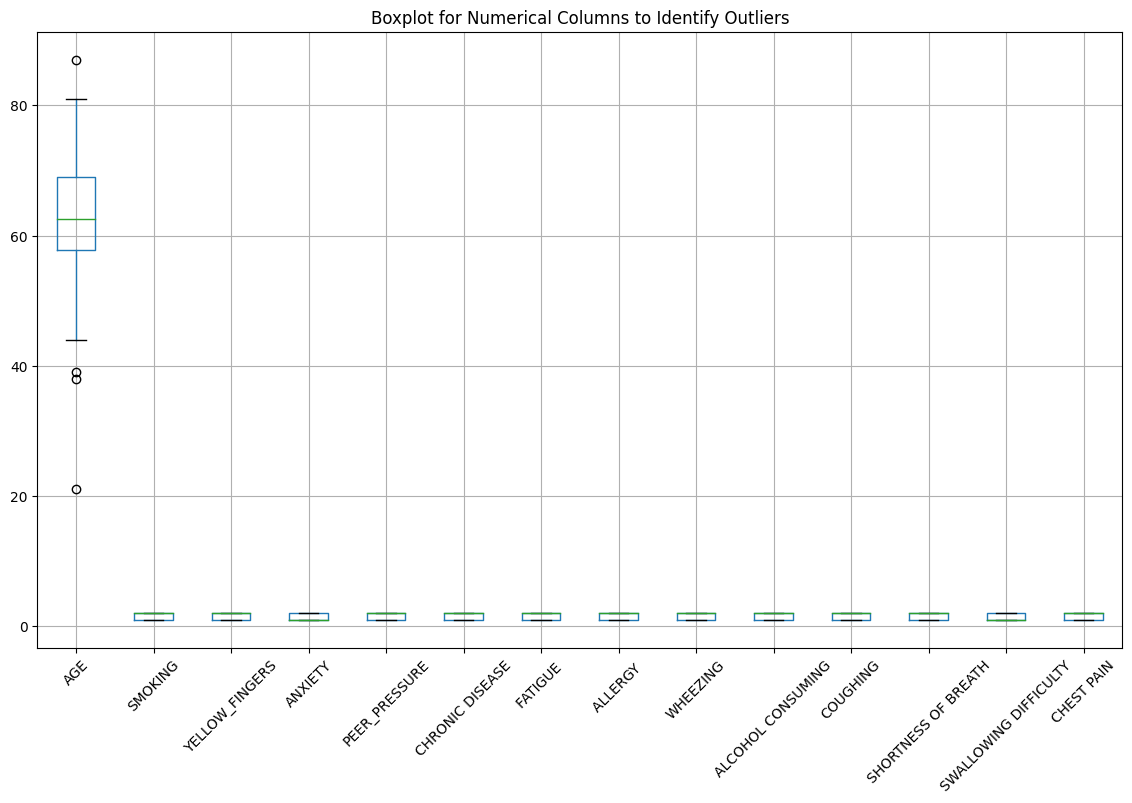

In [29]:
plt.figure(figsize=(14, 8))
data.boxplot()
plt.title('Boxplot for Numerical Columns to Identify Outliers')
plt.xticks(rotation=45)
plt.show()

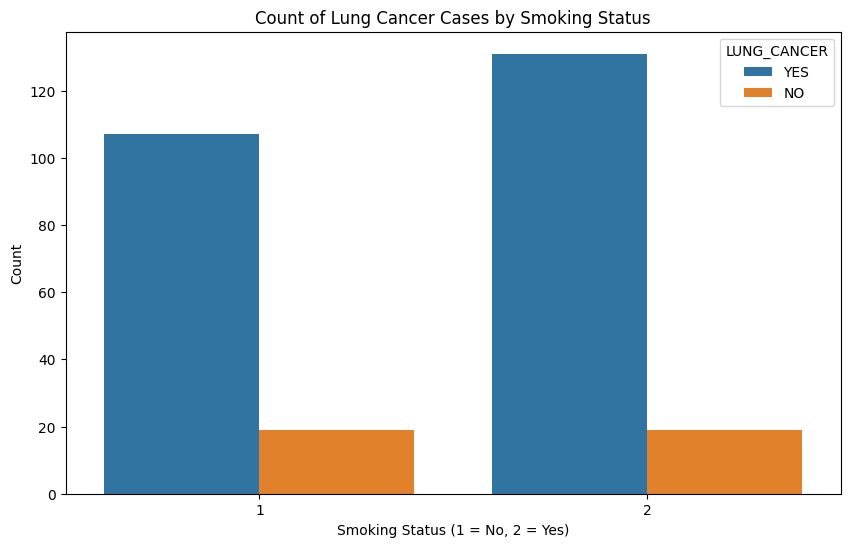

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='SMOKING', hue='LUNG_CANCER')
plt.title('Count of Lung Cancer Cases by Smoking Status')
plt.xlabel('Smoking Status (1 = No, 2 = Yes)')
plt.ylabel('Count')
plt.show()

transform

In [35]:
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])

In [36]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1
280,0,59,2,1,1,1,2,2,2,1,1,1,2,1,1,0
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0


In [37]:
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [39]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [40]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9107142857142857
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



In [42]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred_rf = rf_model.predict(X_test)

In [44]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

In [45]:
print(f'Accuracy: {accuracy_rf}')
print('Classification Report:')
print(report_rf)

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56



In [49]:
models = ['Logistic Regression', 'Random Forest']
accuracies = [0.9107142857142857, accuracy_rf]

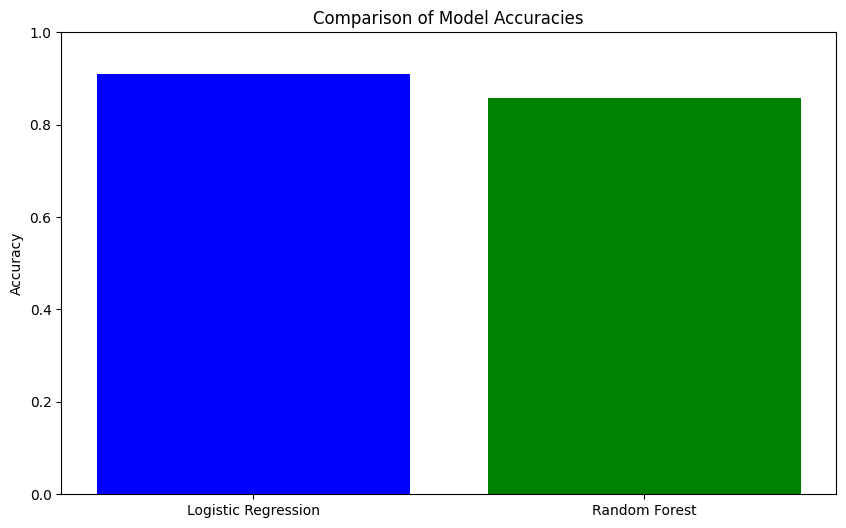

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

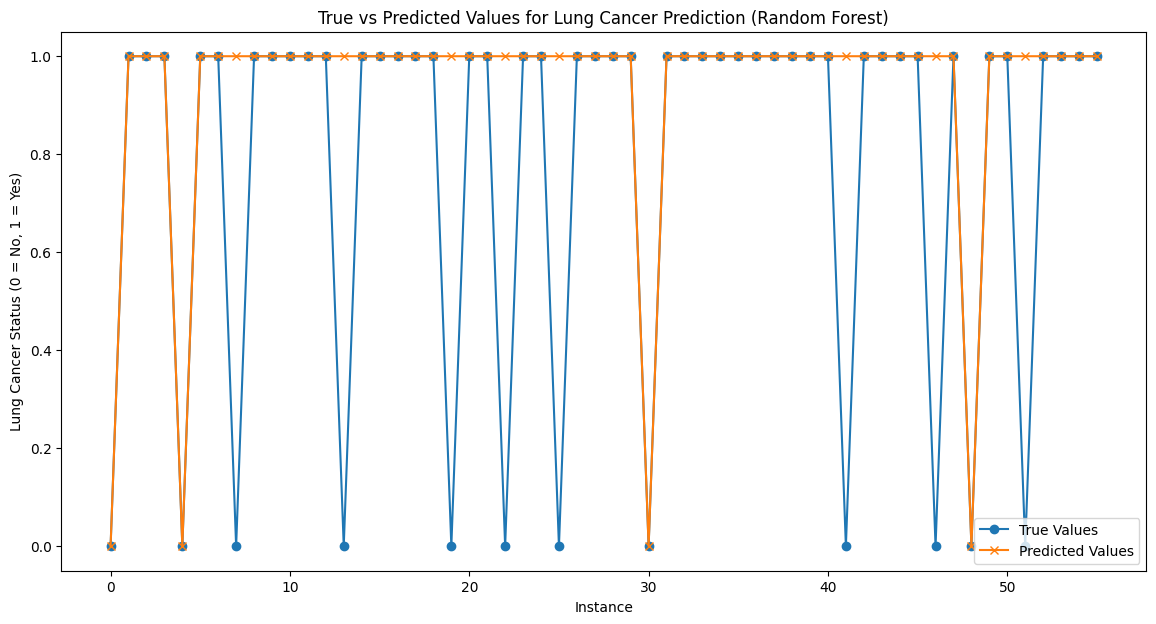

In [51]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='True Values', marker='o')
plt.plot(y_pred_rf, label='Predicted Values', marker='x')
plt.title('True vs Predicted Values for Lung Cancer Prediction (Random Forest)')
plt.xlabel('Instance')
plt.ylabel('Lung Cancer Status (0 = No, 1 = Yes)')
plt.legend()
plt.show()

In [53]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [54]:
rf = RandomForestClassifier(random_state=42)

In [55]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [56]:
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [57]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [58]:
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Improved Accuracy: {accuracy_best}')

Improved Accuracy: 0.8571428571428571


explin

1. Logistic Regression:
النوع: نموذج خطي (Linear Model).
كيفية العمل:
Logistic Regression هو نموذج يستخدم للتحليل الإحصائي من أجل التصنيف الثنائي. يحاول النموذج إيجاد علاقة خطية بين المتغيرات المستقلة (features) والمتغير التابع (target) من خلال دالة لوجستية (sigmoid function).
يستخدم النموذج لحساب الاحتمالية لكل فئة (مثلاً، مصاب أو غير مصاب)، ويعين الفئة التي تكون احتمالاتها أعلى.
التعقيد: بسيط نسبيًا، وسهل التفسير.
المميزات:
سريع التنفيذ ويعمل بشكل جيد مع مجموعات البيانات الصغيرة والمتوسطة الحجم.
يمكن فهم وتفسير التنبؤات بسهولة بسبب الطبيعة الخطية للنموذج.
القيود:
يفترض وجود علاقة خطية بين المتغيرات المستقلة والمتغير التابع.
أداءه قد يكون ضعيفًا إذا كانت البيانات تحتوي على الكثير من الميزات غير الخطية أو التفاعلية.
2. Random Forest:
النوع: نموذج غير خطي (Non-linear Model)، وأحد نماذج التعلم بالجمع (Ensemble Learning).
كيفية العمل:
Random Forest هو مجموعة من عدة نماذج أشجار القرار (Decision Trees) التي تعمل معًا.
كل شجرة تُدرّب على جزء مختلف من البيانات (أو باستخدام ميزات مختلفة)، ثم يتم استخدام متوسط أو تصويت التنبؤات لجميع الأشجار للحصول على النتيجة النهائية.
التعقيد: معقد نسبيًا ويصعب تفسيره بسبب عدد الأشجار والمميزات المختارة.
المميزات:
يعمل بشكل جيد مع البيانات غير الخطية والمجموعات الكبيرة والمعقدة من البيانات.
قوي في التعامل مع البيانات غير المتوازنة والقيم الشاذة.
تقليل فرص التحيز والنشوز بفضل استخدام العديد من الأشجار.
القيود:
يحتاج إلى مزيد من الوقت للتدريب بالمقارنة مع النماذج الخطية مثل Logistic Regression.
صعب التفسير بسبب العدد الكبير من الأشجار.
متى تستخدم كل نموذج:
Logistic Regression:
عندما يكون لديك بيانات بسيطة أو عندما تريد نموذجًا سريعًا وسهل التفسير.
عندما تعرف أن العلاقة بين المتغيرات مستقيمة أو قريبة من الخطية.
Random Forest:
عندما تتعامل مع بيانات معقدة أو عندما تحتاج إلى نموذج قوي يتعامل مع البيانات غير الخطية والتفاعلية.
عندما تريد نموذجًا يمكنه التعامل مع العديد من الميزات وإعطاء تنبؤات قوية حتى في حالة وجود بيانات مشوشة أو قيم شاذة.
